# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key
#! pip install --user citipy
# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy
testcity = citipy
print(testcity)

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

<module 'citipy.citipy' from '/opt/anaconda3/lib/python3.8/site-packages/citipy/citipy.py'>


## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)
#print (lats)
 

602

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
#building url to access api data
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

query_url = f"{url}appid={weather_api_key}&units={units}&q="
print(query_url)
        

http://api.openweathermap.org/data/2.5/weather?appid=9524f254c33e4f8f675a96ca2428db75&units=imperial&q=


In [4]:
# Loop through the list of cities and perform a request for data on each
city_list = []

print("Beginning Data Retrieval")
for city in cities:
    try:
        print(f"Processing Record of | {city}")
        response = requests.get(query_url + city).json()
        name = (response["name"])
        lat = (response['coord']['lat'])
        long = (response['coord']['lon'])
        temp = (response['main']['temp'])
        humidity = (response['main']['humidity'])
        cloudiness = (response['clouds']['all'])
        windspeed = (response['wind']['speed'])
        city_dictionary = {"City Name": name,
                          "Lattitude": lat,
                          "Longitude": long,
                          "temperature": temp,
                          "Humidity": humidity,
                          "Cloudiness": cloudiness,
                          "Windspeed": windspeed}
        city_list.append(city_dictionary)
    
    except(KeyError):
        print("City not found")
        next
print(city_list[0])

Beginning Data Retrieval
Processing Record of | bluff
Processing Record of | saint-louis
Processing Record of | port elizabeth
Processing Record of | mitu
Processing Record of | kaitangata
Processing Record of | barentsburg
City not found
Processing Record of | touros
Processing Record of | rikitea
Processing Record of | codrington
Processing Record of | busselton
Processing Record of | lompoc
Processing Record of | tuktoyaktuk
Processing Record of | arraial do cabo
Processing Record of | chokurdakh
Processing Record of | khatanga
Processing Record of | ixtapa
Processing Record of | taolanaro
City not found
Processing Record of | hilo
Processing Record of | thaton
Processing Record of | puerto baquerizo moreno
Processing Record of | illoqqortoormiut
City not found
Processing Record of | meulaboh
Processing Record of | hermanus
Processing Record of | eirunepe
Processing Record of | saldanha
Processing Record of | puerto ayora
Processing Record of | qaanaaq
Processing Record of | avarua


Processing Record of | hami
Processing Record of | kortkeros
Processing Record of | dali
Processing Record of | ilinskiy
Processing Record of | fortuna
Processing Record of | amantea
Processing Record of | ilesha
Processing Record of | bur gabo
City not found
Processing Record of | portland
Processing Record of | the valley
Processing Record of | san quintin
Processing Record of | quatre cocos
Processing Record of | caconda
Processing Record of | upernavik
Processing Record of | tanete
Processing Record of | aquidauana
Processing Record of | gunjur
Processing Record of | iracoubo
Processing Record of | nizhneyansk
City not found
Processing Record of | salalah
Processing Record of | mahebourg
Processing Record of | nioro
Processing Record of | hervey bay
Processing Record of | nikki
Processing Record of | grand river south east
City not found
Processing Record of | kholodnyy
Processing Record of | izumo
Processing Record of | sao filipe
Processing Record of | cabanas
Processing Record o

Processing Record of | raudeberg
Processing Record of | rafaela
Processing Record of | biltine
Processing Record of | teya
Processing Record of | karauzyak
City not found
Processing Record of | faanui
Processing Record of | warqla
City not found
Processing Record of | jinxiang
Processing Record of | areosa
Processing Record of | sinnamary
Processing Record of | cervo
Processing Record of | bogale
Processing Record of | sao joao da barra
Processing Record of | taitung
Processing Record of | tual
Processing Record of | khagrachari
City not found
Processing Record of | calabozo
Processing Record of | contamana
Processing Record of | tyup
Processing Record of | tankhoy
Processing Record of | ironton
Processing Record of | cayeli
Processing Record of | chipinge
Processing Record of | jackson
Processing Record of | payakumbuh
Processing Record of | asuncion
Processing Record of | dombarovskiy
Processing Record of | huaral
Processing Record of | santa cruz de la palma
Processing Record of | t

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [8]:
city_list_df = pd.DataFrame.from_dict(city_list)
export_csv = city_list_df.to_csv (r'cities_dataframe.csv', index = None, header=True)
pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_rows', 600) 
#city_list_df.head()
city_list_df

,City Name,Lattitude,Longitude,temperature,Humidity,Cloudiness,Windspeed
0,Bluff,-46.60,168.33,37.99,96,100,1.99
1,Saint-Louis,16.33,-15.00,96.80,47,40,4.70
2,Port Elizabeth,-33.92,25.57,53.60,93,90,3.36
3,Mitú,1.20,-70.17,76.66,89,91,3.09
4,Kaitangata,-46.28,169.85,45.00,91,84,1.99
5,Touros,-5.20,-35.46,82.40,61,40,12.75
6,Rikitea,-23.12,-134.97,70.86,82,100,9.55
7,Codrington,-38.27,141.97,46.81,81,90,5.21
8,Busselton,-33.65,115.33,48.42,80,2,7.90
9,Lompoc,34.64,-120.46,57.04,93,69,8.05


In [9]:
city_list_df.head()

,City Name,Lattitude,Longitude,temperature,Humidity,Cloudiness,Windspeed
0,Bluff,-46.60,168.33,37.99,96,100,1.99
1,Saint-Louis,16.33,-15.00,96.80,47,40,4.70
2,Port Elizabeth,-33.92,25.57,53.60,93,90,3.36
3,Mitú,1.20,-70.17,76.66,89,91,3.09
4,Kaitangata,-46.28,169.85,45.00,91,84,1.99


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [15]:
city_list_df[city_list_df['Humidity']<=100].count()

City Name      561
Lattitude      561
Longitude      561
temperature    561
Humidity       561
Cloudiness     561
Windspeed      561
dtype: int64

In [7]:
#  Get the indices of cities that have humidity over 100%.


Int64Index([], dtype='int64')

In [8]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,pimentel,-6.84,-79.93,66.20,29,75,5.82,PE,1585764415
1,victoria,22.29,114.16,69.01,88,40,18.34,HK,1585764288
2,padang,-0.95,100.35,79.90,75,99,1.63,ID,1585764115
3,hasaki,35.73,140.83,55.00,100,75,4.70,JP,1585764415
4,kahului,20.89,-156.47,70.00,88,1,7.63,US,1585764415


In [9]:
# Extract relevant fields from the data frame


# Export the City_Data into a csv


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

Text(0.5, 1.0, 'City Latitude vs. Temp 07/27/20')

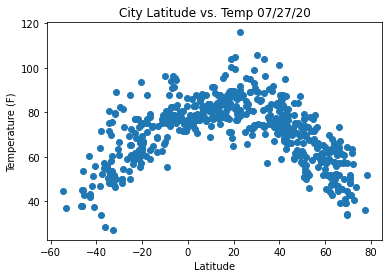

In [20]:
plt.scatter(city_list_df['Lattitude'],city_list_df['temperature'])
plt.ylabel("Temperature (F)")
plt.xlabel("Latitude")
plt.title("City Latitude vs. Temp 07/27/20")

## Latitude vs. Humidity Plot

Text(0.5, 1.0, 'City Latitude vs. Humidity 07/27/20')

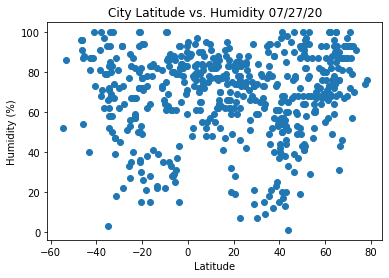

In [21]:
plt.scatter(city_list_df['Lattitude'],city_list_df['Humidity'])
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.title("City Latitude vs. Humidity 07/27/20")

## Latitude vs. Cloudiness Plot

Text(0.5, 1.0, 'City Latitude vs. Cloudiness 07/27/20')

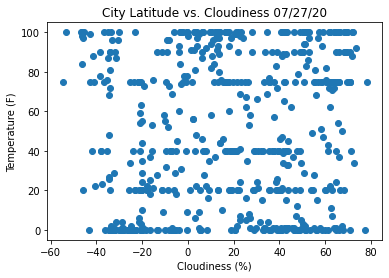

In [22]:
plt.scatter(city_list_df['Lattitude'],city_list_df['Cloudiness'])
plt.ylabel("Temperature (F)")
plt.xlabel("Cloudiness (%)")
plt.title("City Latitude vs. Cloudiness 07/27/20")

## Latitude vs. Wind Speed Plot

Text(0.5, 1.0, 'City Latitude vs. Wind Speed 07/27/20')

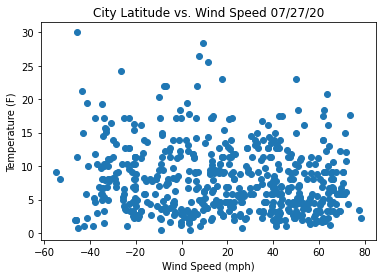

In [23]:
plt.scatter(city_list_df['Lattitude'],city_list_df['Windspeed'])
plt.ylabel("Temperature (F)")
plt.xlabel("Wind Speed (mph)")
plt.title("City Latitude vs. Wind Speed 07/27/20")

## Linear Regression

In [24]:
# OPTIONAL: Create a function to create Linear Regression plots
def trendline(x,y):
    import scipy.stats as st
    slope, inter, r, p, std_err = st.linregress(x,y)
    fit = slope * x + inter
    plt.plot(x,fit,"--r",label="y = "+ str(round(slope,2)) + "x + "+ str(round(inter,1))+', r = ' + str(round(r,2)))
    plt.legend()

In [26]:
# Create Northern and Southern Hemisphere DataFrames
northern_hem_cities_df=city_list_df[city_list_df['Lattitude']>0]
southern_hem_cities_df=city_list_df[city_list_df['Lattitude']<0]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

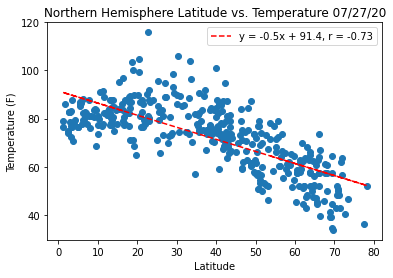

In [29]:
plt.scatter(northern_hem_cities_df['Lattitude'],northern_hem_cities_df['temperature'])
plt.ylabel("Temperature (F)")
plt.xlabel("Latitude")
plt.title("Northern Hemisphere Latitude vs. Temperature 07/27/20")
trendline(northern_hem_cities_df['Lattitude'],northern_hem_cities_df['temperature'])

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

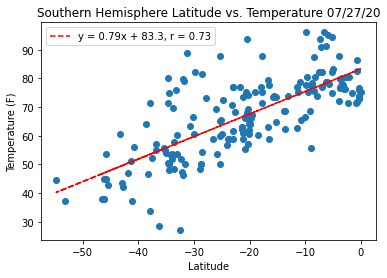

In [31]:
plt.scatter(southern_hem_cities_df['Lattitude'],southern_hem_cities_df['temperature'])
plt.ylabel("Temperature (F)")
plt.xlabel("Latitude")
plt.title("Southern Hemisphere Latitude vs. Temperature 07/27/20")
trendline(southern_hem_cities_df['Lattitude'],southern_hem_cities_df['temperature'])

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

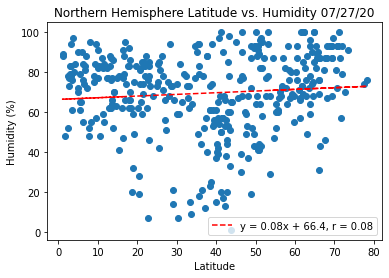

In [32]:
plt.scatter(northern_hem_cities_df['Lattitude'],northern_hem_cities_df['Humidity'])
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.title("Northern Hemisphere Latitude vs. Humidity 07/27/20")
trendline(northern_hem_cities_df['Lattitude'],northern_hem_cities_df['Humidity'])

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

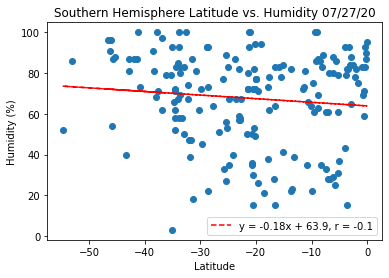

In [33]:
plt.scatter(southern_hem_cities_df['Lattitude'],southern_hem_cities_df['Humidity'])
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.title("Southern Hemisphere Latitude vs. Humidity 07/27/20")
trendline(southern_hem_cities_df['Lattitude'],southern_hem_cities_df['Humidity'])

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

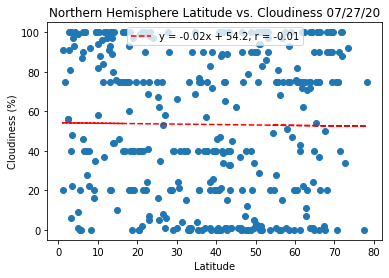

In [34]:
plt.scatter(northern_hem_cities_df['Lattitude'],northern_hem_cities_df['Cloudiness'])
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.title("Northern Hemisphere Latitude vs. Cloudiness 07/27/20")
trendline(northern_hem_cities_df['Lattitude'],northern_hem_cities_df['Cloudiness'])

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

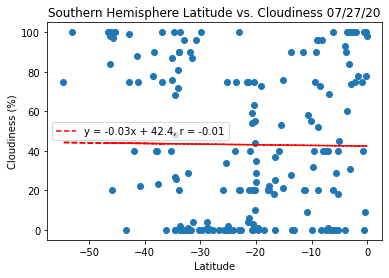

In [35]:
plt.scatter(southern_hem_cities_df['Lattitude'],southern_hem_cities_df['Cloudiness'])
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.title("Southern Hemisphere Latitude vs. Cloudiness 07/27/20")
trendline(southern_hem_cities_df['Lattitude'],southern_hem_cities_df['Cloudiness'])

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

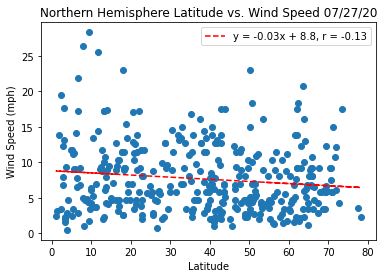

In [38]:
plt.scatter(northern_hem_cities_df['Lattitude'],northern_hem_cities_df['Windspeed'])
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.title("Northern Hemisphere Latitude vs. Wind Speed 07/27/20")
trendline(northern_hem_cities_df['Lattitude'],northern_hem_cities_df['Windspeed'])

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

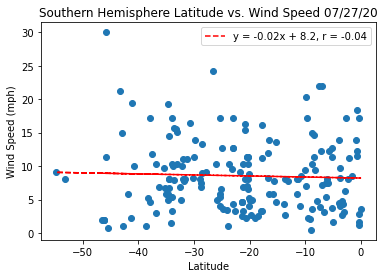

In [39]:
plt.scatter(southern_hem_cities_df['Lattitude'],southern_hem_cities_df['Windspeed'])
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.title("Southern Hemisphere Latitude vs. Wind Speed 07/27/20")
trendline(southern_hem_cities_df['Lattitude'],southern_hem_cities_df['Windspeed'])